In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00
mean,40.11,256.79,2.54,960.42,0.19,0.08,93.58,-40.50,3.62,5166.48
std,10.31,254.70,2.57,191.92,0.54,1.56,0.58,4.59,1.73,73.67
min,18.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.64,4963.60
25%,32.00,103.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.33,5099.10
50%,38.00,181.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,317.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,88.00,3643.00,35.00,999.00,6.00,1.40,94.77,-26.90,5.04,5228.10


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,...,0,20,0,1,9,17,6,221,10,0
4115,21,0,1,3,0,2,0,1,3,0,...,0,20,0,1,9,17,6,222,10,0
4116,9,8,2,3,0,0,0,0,6,1,...,1,20,1,0,3,8,4,160,6,0
4117,40,0,1,3,0,0,0,0,1,0,...,0,20,0,1,9,13,17,229,10,0


In [9]:
df_encoded['y'].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [10]:
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [11]:
x = df_encoded.drop('y',axis=1)  # independent variable
y = df_encoded['y']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 20)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [14]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [15]:
# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.54      0.48      0.51       131

    accuracy                           0.90      1236
   macro avg       0.74      0.72      0.73      1236
weighted avg       0.90      0.90      0.90      1236

[[1051   54]
 [  68   63]]


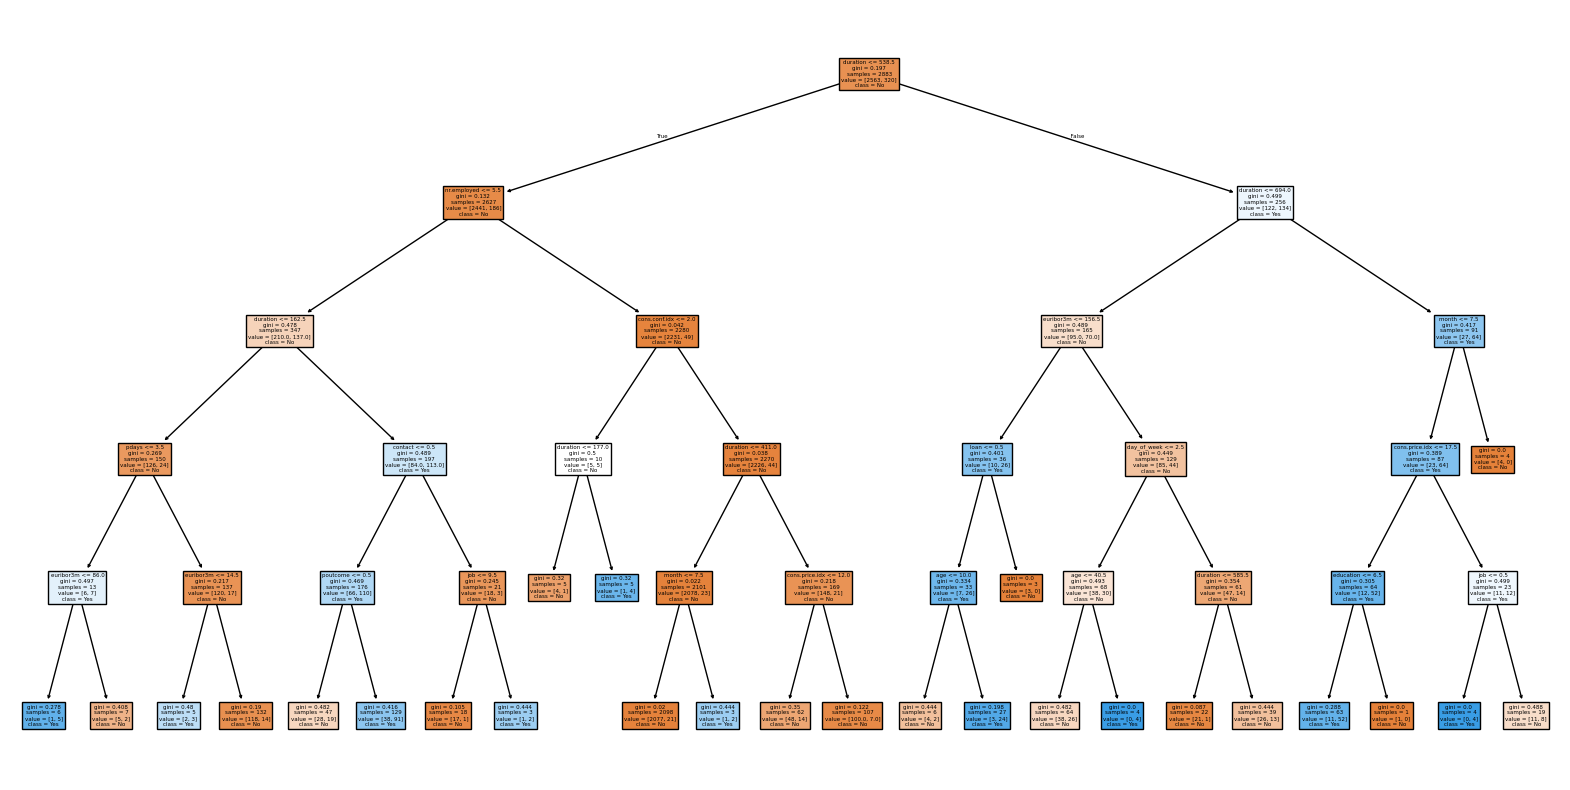

In [16]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['No', 'Yes'])
plt.show()